we will do the following things:
*Data Analysis
*feature engineering
*standardization
*model building
*predictions


streamlit- it is an ui based package in which we can convert the

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [78]:
#load the file
# 0 and 1 dataset
dt=pd.read_csv('/content/heartattackriskpredict.csv')

In [79]:
# identitfy the null values
dt.isnull()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1021,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1022,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1023,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [80]:
# removing the unwanted column
dt= dt.drop(['oldpeak',''],axis=1)


In [81]:
# checking whether it has removed or not
dt.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,0,0,3,0
3,61,1,0,148,203,0,1,161,0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1,3,2,0


In [82]:
dt.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [83]:
dt.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,-0.267335,0.107849,0.197201,-0.438029
slope,-0.169105,-0.026666,0.131633,-0.120445,-0.014248,-0.061902,0.086086,0.395308,-0.267335,1.000000,-0.073440,-0.094090,0.345512



**Understanding DataSet:**
Age : Age of the patient

Sex : Sex of the patient

exang: exercise induced angina (1 = yes; 0 = no)

ca: number of major vessels (0-3)

cp : Chest Pain type chest pain type

Value 0: typical angina

Value 1: atypical angina

Value 2: non-anginal pain

Value 3: asymptomatic

trtbps : resting blood pressure (in mm Hg)

chol : cholestoral in mg/dl fetched via BMI sensor

fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

rest_ecg : resting electrocardiographic results

Value 0: normal

Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

thalach : maximum heart rate achieved

target : 0= less chance of heart attack

 1= more chance of heart attack

Let See For Our Continuous Variable

Visualization:
KDE is particularly useful for visualizing the shape of the
distribution, especially when dealing with continuous data.

 It provides a more informative representation compared to just a histogram

Explanation:

 The kde=True parameter indicates that a kernel density estimate (KDE) should be overlaid on the histogram.

to get the details about the data

<Axes: title={'center': 'Age of patients'}, xlabel='Age', ylabel='count'>

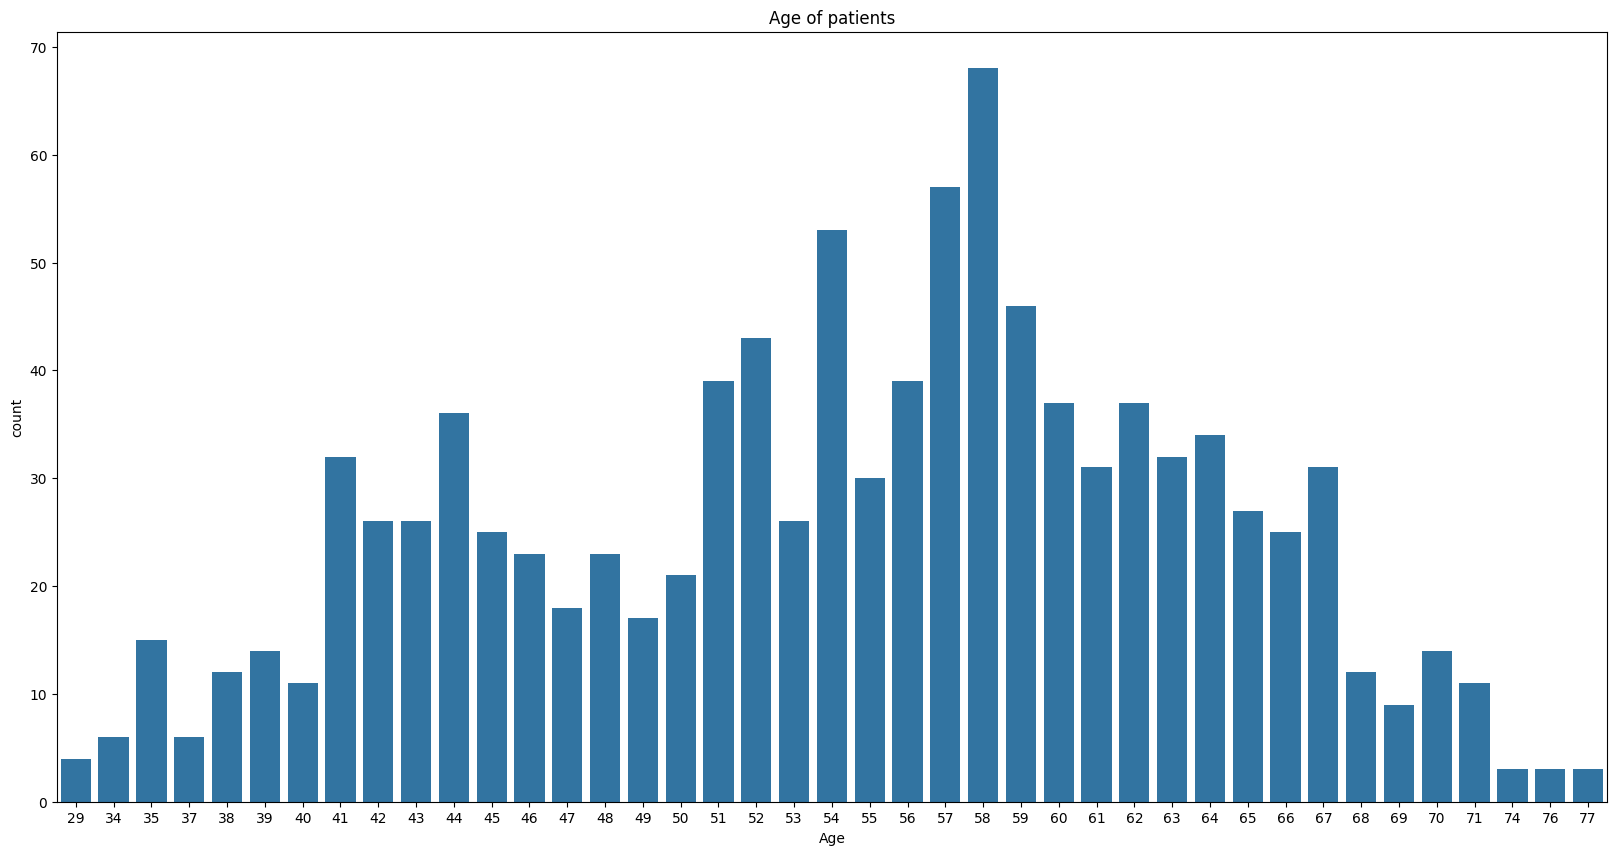

In [84]:
plt.figure(figsize=(20,10))# without figuresize everything will collapse
plt.title("Age of patients")
plt.xlabel('Age')
sns.countplot(x='age',data=dt)


# As we can the patients  are of age group 51-67 in majority

<Axes: title={'center': 'Sex of Patients, 0 is Male and 1 is Female'}, xlabel='sex', ylabel='count'>

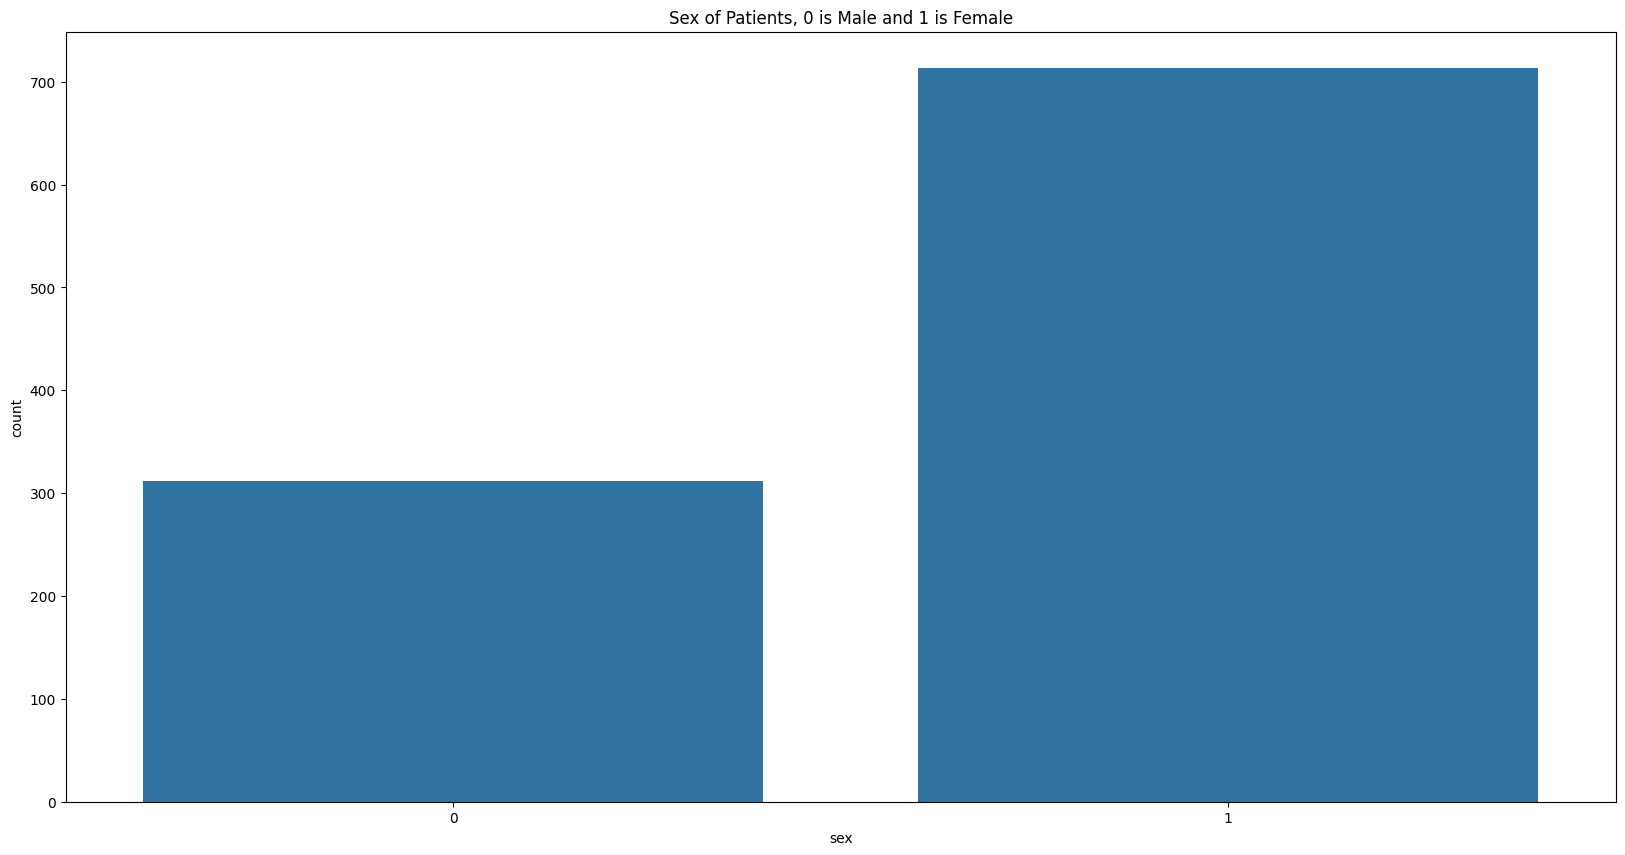

In [85]:
plt.figure(figsize=(20, 10))
plt.title("Sex of Patients, 0 is Male and 1 is Female")
sns.countplot(x='sex',data=dt)

In [86]:
cp_data=dt['cp'].value_counts().reset_index()
cp_data.columns=['Chest Pain Type','Count']
cp_data['Chest Pain Type']=cp_data['Chest Pain Type'].replace({0: 'Typical Angina', 1: 'Atypical Angina', 2: 'Non-Anginal Pain', 3: 'Asymptomatic'})
cp_data

,Chest Pain Type,Count
0,Typical Angina,497
1,Non-Anginal Pain,284
2,Atypical Angina,167
3,Asymptomatic,77


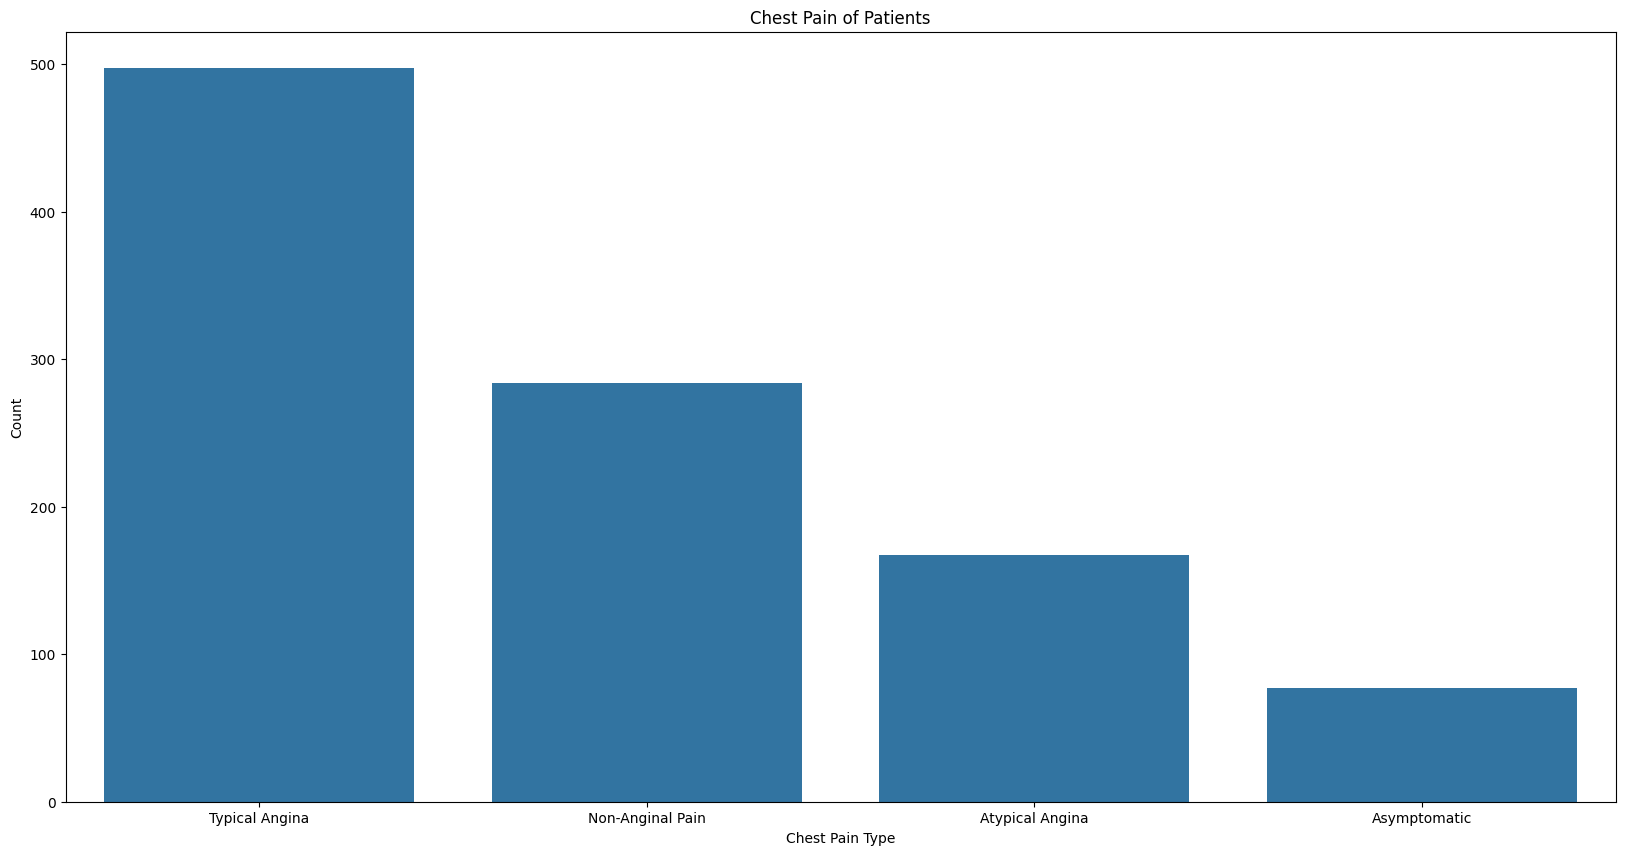

In [87]:
plt.figure(figsize=(20, 10))
plt.title("Chest Pain of Patients")
sns.barplot(x=cp_data['Chest Pain Type'], y=cp_data['Count'])
plt.xlabel("Chest Pain Type")
plt.ylabel("Count")
plt.show()

In [88]:
ecg_data= dt['restecg'].value_counts().reset_index()
ecg_data.columns=['Rest ECG','Count']
ecg_data['Rest ECG'] = ecg_data['Rest ECG'].replace({0:'Normal',1: 'ST-T Wave Abnormality', 2: 'Left Ventricular Hypertrophy'})
ecg_data

,Rest ECG,Count
0,ST-T Wave Abnormality,513
1,Normal,497
2,Left Ventricular Hypertrophy,15


# 0-  Normal - This means that the electrical activity of the heart is within normal parameters, showing a regular heartbeat without any significant abnormalities.
# 1-ST Segment: It's a flat line after the QRS complex, showing the period when the heart's main pumping chambers relax before starting to recharge. Changes here can signal heart issues.
# 2-Left ventricular hypertrophy (LVH) happens when the muscle wall of the heart's left pumping chamber becomes thicker than normal. This can be caused by things like high blood pressure, a narrowed aortic valve, or certain heart conditions.

# Think of it like this: Imagine the left ventricle of the heart as a room that pumps blood out to the body. When the walls of this room get thicker, it's like the room is becoming smaller and tighter. This can make it harder for the heart to pump blood effectively, leading to problems like high blood pressure, chest pain, or even heart failure

<ipython-input-89-ae4dd66975cf>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dt['chol'],kde=True,color='red')


Text(0.5, 0, 'Chlorestrol')

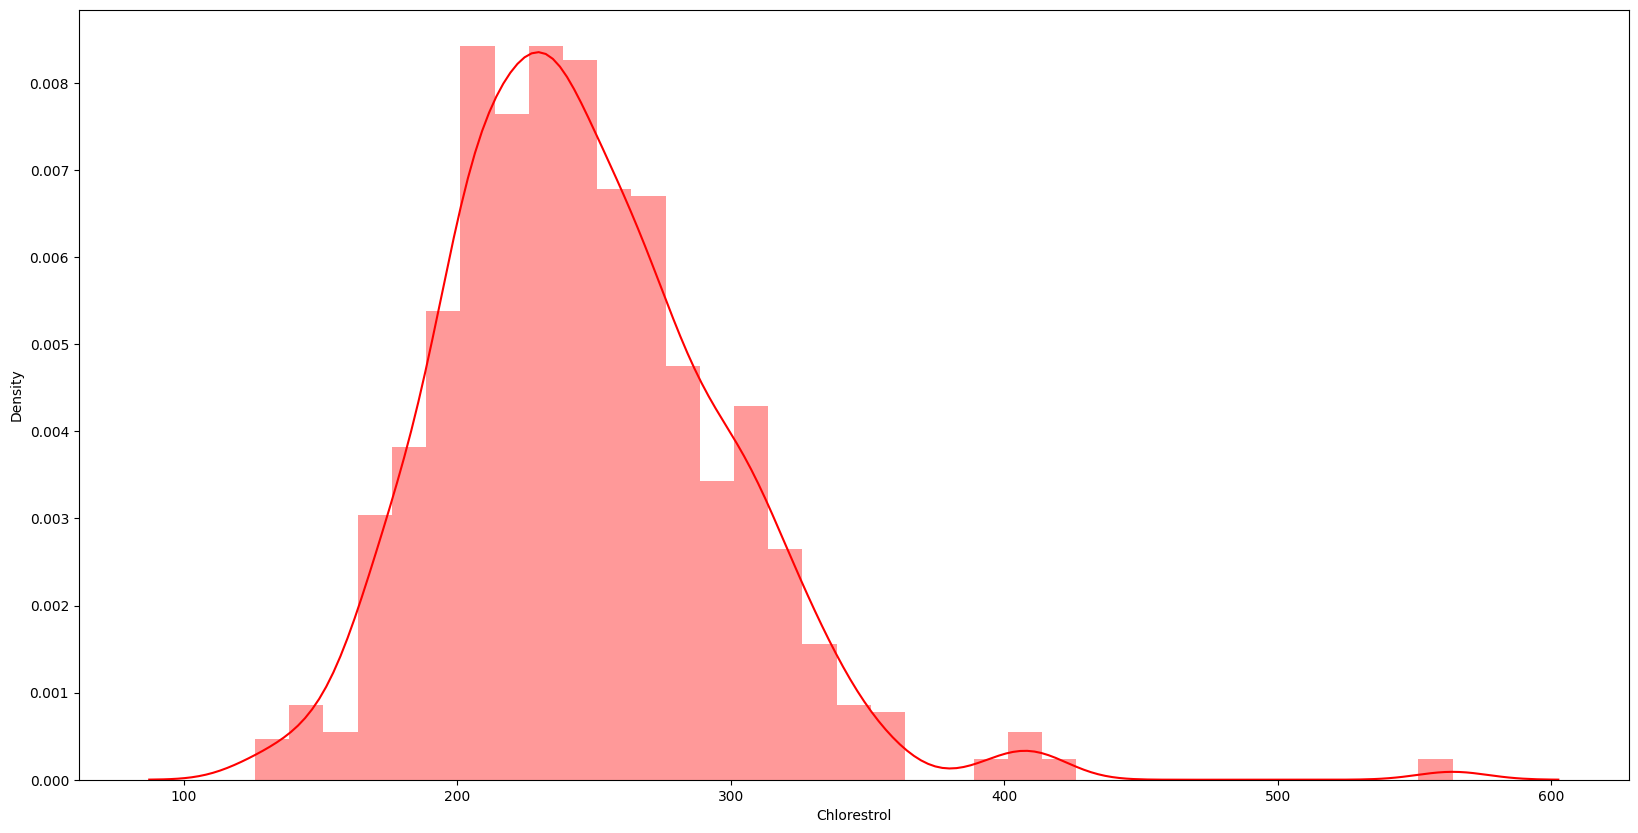

In [89]:
plt.figure(figsize=(20,10))#
sns.distplot(dt['chol'],kde=True,color='red')
plt.xlabel("Chlorestrol")

# we have done the Analysis of the data now let's have a look at out data

In [90]:
dt.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,0,0,3,0
3,61,1,0,148,203,0,1,161,0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1,3,2,0


Let us do Standardization

data va standard aakanumna use pananum

In [91]:
from sklearn.preprocessing import StandardScaler # to check the quality of the data and it is under sklearn package

In [92]:
scale=StandardScaler()

In [93]:
scale.fit(dt)

StandardScaler()

We can insert this data into the ML models

We will use the following models for our predictions :

Logistic Regression

Decision Tree

Random Forest

K Nearest Neighbour

SVM

# Then we will use the assembling techniques

# Let split our data

In [94]:
#define x (features) and y (target variable)
x=dt.drop(columns=['target'])
y=dt['target']# Assuming output is the targrt variable

#I see, you're asking about the mechanics of how the train-test split works, particularly if the testing data will be included in the training dataset. Let me clarify:

#When you perform a train-test split, the testing data is entirely separate from the training data. In a 70-30 split, 70% of your original dataset is randomly selected for training, and the remaining 30% is allocated for testing. The testing data is not included in the training dataset.

#Here's a breakdown:

#- **Training Dataset (70%)**: This dataset is used exclusively for training your machine learning model. It consists of a subset of your original data, randomly selected without replacement. The model learns patterns and relationships from this data to make predictions.

#- **Testing Dataset (30%)**: This dataset is held out and not used during the training phase. It serves as an unseen dataset that the trained model has never encountered. After training, you evaluate the performance of the model on this separate dataset to assess how well it generalizes to new, unseen data.

# So, to answer your question directly: No, the testing data is not included in the 70% training dataset. It's kept separate and used solely for evaluating the model's performance after training. This separation ensures an unbiased assessment of the model's ability to generalize to new, unseen data.

In [95]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)# train will take 70 percent and test will take 30 percent
# random_state 40 to 50 will have random datas if ot excess above 50 it will not show accuracy
#textwise data -> train_test_split
#image wise data -> train_test_valid

**LOGISTIC REGESSION**

In [96]:
from sklearn.linear_model import LogisticRegression

In [97]:
from sklearn.preprocessing import LabelEncoder # we have given label for the dataset  so that we are using label encoding

In [98]:
le=LabelEncoder()

Label encoding is used to convert categorical labels (like "cat", "dog", "rabbit") into numerical values that machine learning models can understand. This is necessary because many algorithms require numerical inputs.

After label encoding the target labels (y_train), you fit the model using both the features (x_train) and the encoded target labels (y_train). This provides the model with the necessary data to learn the relationship between the features and the target labels.

In short, label encoding makes categorical labels numeric, allowing the model to learn from them alongside the features during training

In [99]:
encoding=le.fit_transform(y_train)

In [100]:
logreg=LogisticRegression()

In [101]:
logreg.fit(x_train,encoding)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Accuracy= TP+TN/TP+TN+FP+FN


# Look at the distribution of TP, TN, FP, and FN values. A higher number of TP and TN and a lower number of FP and FN generally indicate better prediction performance.

In [102]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [103]:
encode_ytest=le.fit_transform(y_test)

In [104]:
# Fit the Logistic Regression model with training data
logreg.fit(x_train, y_train)

# Make predictions on the test data
Y_pred1 = logreg.predict(x_test)

# Calculate confusion matrix
lr_conf_matrix = confusion_matrix(y_test, Y_pred1)

# Calculate accuracy score
lr_acc_score = accuracy_score(y_test, Y_pred1)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [111]:
#calculate the accuracy score
acc_score=accuracy_score(y_test,Y_pred1)
acc_score

0.8084415584415584

Accuracy is 80%

In [113]:
Y_pred1 = logreg.predict(x_test)
lr_conf_matrix = confusion_matrix(encode_ytest,Y_pred1 )
lr_acc_score = accuracy_score(encode_ytest, Y_pred1)

To determine if your predictions are correct:

Check the main diagonal (from top-left to bottom-right). If the values on this diagonal are high, it indicates that your model is making correct predictions.
Calculate accuracy, which is the proportion of correct predictions over the total number of predictions. It's calculated as (TP + TN) / (TP + TN + FP + FN). A high accuracy indicates good performance.

In [114]:
lr_conf_matrix

array([[121,  38],
       [ 21, 128]])

In [115]:
print(lr_acc_score*100,'%')

80.84415584415584 %


#logistic regression- have numerics and strings
# decision tree- root and subroot or yes or no
#-> if we use decision tree it is enough
# the correct algorithm gives the right accuracy

In [116]:
from sklearn.tree import DecisionTreeClassifier

In [118]:
tree=DecisionTreeClassifier()

In [120]:
tree.fit(x_train,encoding)

DecisionTreeClassifier()

In [121]:
ypred2=tree.predict(x_test)

In [122]:
encode_ytest=le.fit_transform(y_test)

In [124]:
tree_conf_matrix=confusion_matrix(ypred2,encode_ytest)
tree_acc_score=accuracy_score(ypred2,encode_ytest)

In [125]:
tree_conf_matrix

array([[159,   9],
       [  0, 140]])

In [127]:
print(tree_acc_score*100,"%")

97.07792207792207 %


#Dumping the model into the pickle file

In [128]:
import pickle

In [130]:
#Train the Logistic Regression model
logreg=LogisticRegression()
logreg.fit(x_train,encoding)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [131]:
#Make predictions
Y_pred1=logreg.predict(x_test)

In [132]:
lr_acc_score=accuracy_score(Y_pred1,y_test)

#with open('model.pkl', 'wb') as model_file:: This line opens a file named 'model.pkl' in write mode ('wb' stands for write binary). The with statement is used here to ensure that the file is properly closed after writing, even if an error occurs during the process. The file object is referred to as model_file within the with block.
# pickle.dump(logreg, model_file): Here, pickle.dump() is used to serialize (convert into a byte stream) the logreg object and write it to the opened file model_file. Serialization is the process of converting an object into a format that can be easily stored or transmitted and later reconstructed. In this case, logreg is assumed to be a trained machine learning model (e.g., logistic regression model) that you want to save.
#In simpler terms, this code snippet is saving a trained machine learning model (logreg) to a file named 'model.pkl' using the Python pickle module. The saved model can then be loaded from the file at a later time for making predictions or further analysis

In [134]:
#save the model to the file
with open('heartattack.pkl','wb') as model_file:
  pickle.dump(logreg,model_file)